In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DEMO = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv',encoding='cp949')
PDDE = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv',encoding='cp949', low_memory=False)
COP_U = pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv',encoding='cp949',low_memory=False)
PD_CLAC = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv',encoding='cp949', low_memory=False)
BR = pd.read_csv('LPOINT_BIG_COMP_05_BR.csv',encoding='cp949', low_memory=False)

# 1. DEMO
-고객번호, 성별, 연령대, 거주지대분류코드

In [3]:
DEMO.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [4]:
DEMO.describe()

,cust,ma_fem_dv,ages,zon_hlv
count,29913,29913,29913,29913
unique,29913,2,6,17
top,M000034966,여성,40대,Z10
freq,1,20083,9863,8157


In [5]:
DEMO[DEMO['ma_fem_dv']=='여성'].count()

cust         20083
ma_fem_dv    20083
ages         20083
zon_hlv      20083
dtype: int64

In [6]:
DEMO.drop(columns=['cust'],inplace=True)

In [7]:
DEMO.isna().sum()

ma_fem_dv    0
ages         0
zon_hlv      0
dtype: int64

In [8]:
DEMO.groupby('zon_hlv')['ages'].count()

zon_hlv
Z01     474
Z02     103
Z03     600
Z04    1750
Z05     576
Z06    1080
Z07     204
Z08     739
Z09     642
Z10    8157
Z11    1840
Z12     803
Z13     896
Z14     988
Z15     677
Z16    2503
Z17    7881
Name: ages, dtype: int64

In [9]:
DEMO.groupby('ages')['zon_hlv'].count()

ages
20대    3853
30대    7736
40대    9863
50대    5633
60대    2115
70대     713
Name: zon_hlv, dtype: int64

# 2. 상품구매 정보

In [10]:
PDDE.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [11]:
PDDE.drop(columns=['cust','rct_no','cop_c'],inplace=True)

In [12]:
PDDE.isna().sum()

chnl_dv         0
br_c       428501
pd_c            0
de_dt           0
de_hr           0
buy_am          0
buy_ct          0
dtype: int64

In [13]:
PDDE.dropna()

,chnl_dv,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,1,A010039,PD0290,20210101,10,15000.0,1
1,1,A010025,PD1369,20210101,10,79700.0,1
2,1,A010039,PD0290,20210101,10,19000.0,1
3,1,A010039,PD0290,20210101,10,19000.0,1
4,1,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...
4305574,1,A050133,PD0418,20211231,17,139000.0,1
4305575,1,A050318,PD1670,20211231,19,9900.0,1
4305576,1,A050436,PD1677,20211231,17,9400.0,1
4305577,1,A050039,PD1645,20211231,17,7900.0,1


In [14]:
PDDE['chnl_dv'].unique()

array([1, 2], dtype=int64)

In [15]:
PDDE['de_dt'].dtype

dtype('int64')

In [16]:
PDDE['data_time']=PDDE['de_dt'].astype('str')
PDDE['data_time'] = pd.to_datetime(PDDE['data_time'])

In [17]:
PDDE['weekday']=PDDE['data_time'].dt.weekday
PDDE['month']=PDDE['data_time'].dt.month

In [18]:
PDDE.head()

,chnl_dv,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,data_time,weekday,month
0,1,A010039,PD0290,20210101,10,15000.0,1,2021-01-01,4,1
1,1,A010025,PD1369,20210101,10,79700.0,1,2021-01-01,4,1
2,1,A010039,PD0290,20210101,10,19000.0,1,2021-01-01,4,1
3,1,A010039,PD0290,20210101,10,19000.0,1,2021-01-01,4,1
4,1,A010039,PD0290,20210101,10,19000.0,1,2021-01-01,4,1


<AxesSubplot:xlabel='weekday', ylabel='count'>

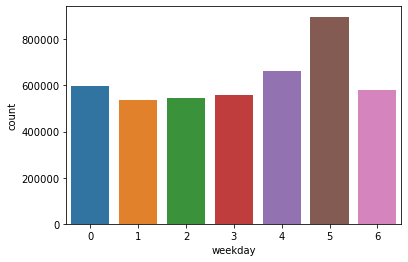

In [19]:
sns.countplot(x=PDDE['weekday'])

<AxesSubplot:xlabel='month', ylabel='count'>

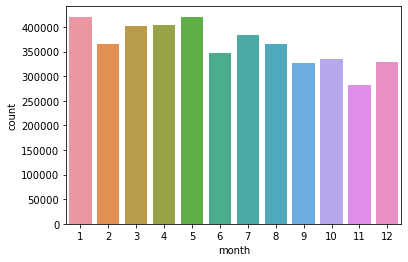

In [20]:
sns.countplot(x=PDDE['month'])

<AxesSubplot:xlabel='de_hr', ylabel='count'>

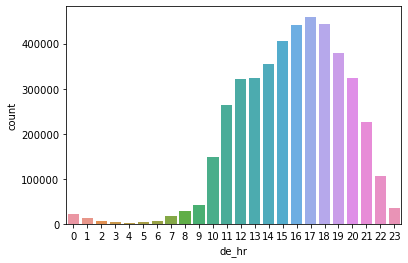

In [21]:
sns.countplot(x=PDDE['de_hr'])

<AxesSubplot:xlabel='chnl_dv', ylabel='count'>

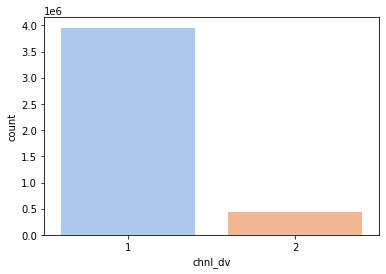

In [22]:
sns.set_palette("pastel")
sns.countplot(x=PDDE['chnl_dv'],)

# 3. 제휴사 이용정보

In [23]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [24]:
COP_U.drop(columns=['cust','rct_no'],inplace=True)

In [25]:
COP_U.head()

,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,B01,B010012,1,20211026,20211026,12,60000
1,B01,B010012,1,20211106,20211106,10,17100
2,B01,B010012,1,20210211,20210211,12,136500
3,B01,B010012,1,20210920,20210920,10,34200
4,D01,D010614,1,20211010,20211010,9,2500


# 4. 상품 분류 정보

In [26]:
PD_CLAC.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [27]:
category1 = PD_CLAC['clac_hlv_nm'].unique()
category1

array(['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자',
       '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품',
       '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권',
       '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물',
       '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스',
       '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명',
       '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물',
       '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어',
       '헬스/피트니스', '화장품/뷰티케어'], dtype=object)

#### 냉동식품 중분류와 소분류

In [28]:
tmp = PD_CLAC.loc[PD_CLAC['clac_hlv_nm']=='냉동식품']
category2 = tmp['clac_mcls_nm'].unique()
category2

array(['냉동간편식', '아이스크림'], dtype=object)

In [29]:
tmp2 = PD_CLAC.loc[PD_CLAC['clac_mcls_nm']=='냉동간편식']
category3 = tmp2['pd_nm'].unique()
category3

array(['냉동밥', '냉동면', '냉동만두', '냉동피자', '냉동핫도그', '냉동튀김', '냉동부침', '냉동국탕류',
       '냉동디저트', '냉동떡볶이', '기타냉동간편식', '냉동간편식세트'], dtype=object)

#### 냉장식품 중분류와 소분류

In [30]:
tmp3 = PD_CLAC.loc[PD_CLAC['clac_hlv_nm']=='냉장식품']
category4 = tmp3['clac_mcls_nm'].unique()
category4

array(['냉장간편식', '냉장음료', '디저트', '어묵/맛살', '포장반찬', '햄/소시지'], dtype=object)

In [31]:
category5 = tmp3['pd_nm'].unique()
category5

array(['냉장밥/죽', '냉장면', '냉장떡', '냉장간편떡볶이', '냉장장류', '냉장드레싱', '냉장핫도그/핫바류',
       '냉장치킨족발류', '냉장국탕류', '냉장안주', '기타냉장간편식', '냉장커피차음료', '냉장과일야채음료',
       '냉장곡물견과음료', '푸딩/젤리', '빵/케이크', '어묵', '맛살', '곤약', '유부', '김밥재료세트',
       '절임반찬', '김치류', '조림반찬', '볶음반찬', '무침반찬', '젓갈', '단무지', '햄', '햄선물세트',
       '베이컨', '소시지'], dtype=object)

# 5. 점포 정보

In [32]:
BR.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [33]:
BR['cop_c'].unique() #A01 롯데백화점 A02 롯데마트 A03 롯데슈퍼 A04 세븐일레븐 A05 롯데하이마트 A06 롯데 ON(이커머스)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01',
       'D02', 'E01'], dtype=object)

In [34]:
store = BR.loc[BR['cop_c'].isin(['A01','A02','A03','A04'])]
store.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


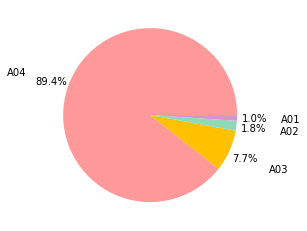

In [35]:
labels = store['cop_c'].value_counts().index.tolist()
ratio = store['cop_c'].value_counts().values.tolist()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio,labels=labels,autopct='%.1f%%',pctdistance=1.2, labeldistance=1.5, colors=colors)
plt.show()